<a href="https://colab.research.google.com/github/nexiouscaliver/cat-dog-image-classifier/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle  #kaggle.json is api token from https://www.kaggle.com/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:07<00:00, 178MB/s]
100% 1.06G/1.06G [00:07<00:00, 147MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [7]:
#creating CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 75s 103ms/step - loss: 1.4246 - accuracy: 0.5752 - val_loss: 0.7865 - val_accuracy: 0.6104
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5913 - accuracy: 0.6857 - val_loss: 0.5814 - val_accuracy: 0.7004
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5333 - accuracy: 0.7308 - val_loss: 0.5415 - val_accuracy: 0.7228
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4508 - accuracy: 0.7804 - val_loss: 0.5036 - val_accuracy: 0.7436
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4100 - accuracy: 0.8067 - val_loss: 0.5383 - val_accuracy: 0.7442
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3500 - accuracy: 0.8379 - val_loss: 0.4720 - val_accuracy: 0.7842
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2839 - accuracy: 0.8687 - val_loss: 0.5806 - val_ac

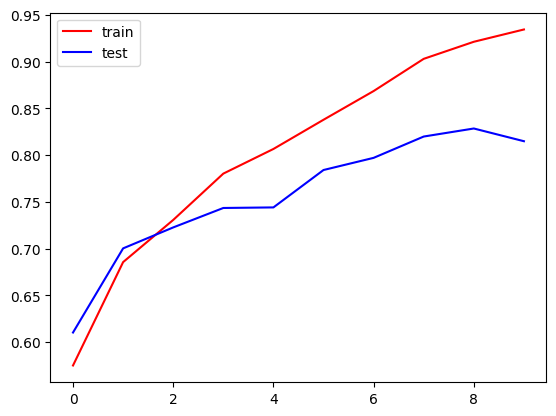

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

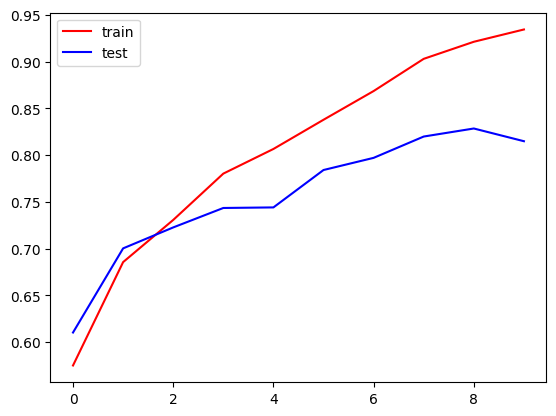

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

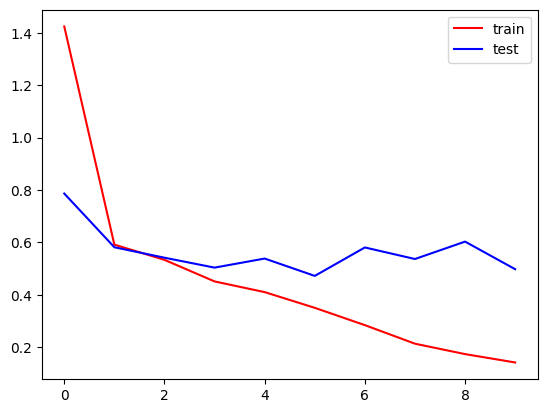

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

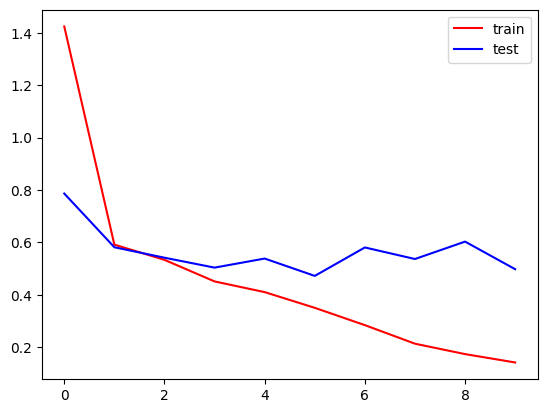

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [16]:
import cv2

In [19]:
test_img = cv2.imread('/content/cat.png')

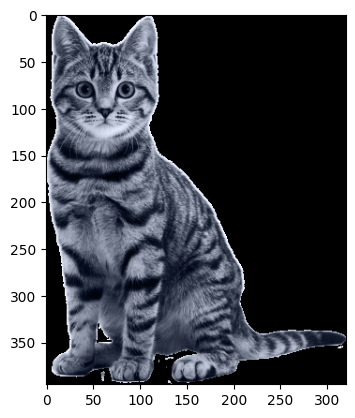

In [20]:
plt.imshow(test_img)

In [21]:
test_img.shape

(395, 320, 3)

In [22]:
test_img = cv2.resize(test_img,(256,256))

In [23]:
test_input = test_img.reshape((1,256,256,3))

In [25]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

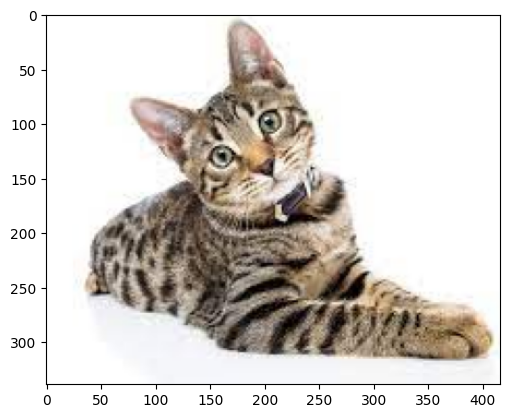

In [26]:
test_img = cv2.imread('/content/cat2.png')
plt.imshow(test_img)

In [27]:
test_img.shape

(339, 416, 3)

In [28]:
test_img = cv2.resize(test_img,(256,256))

In [29]:
test_input = test_img.reshape((1,256,256,3))

In [30]:
model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


array([[0.48725474]], dtype=float32)